In [27]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
from pandas import DataFrame
from scipy.stats import boxcox

In [28]:
df = pd.read_csv('portfolio_data.csv')

In [29]:
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


Text(0.5, 1.0, 'BTC Daily Stocks')

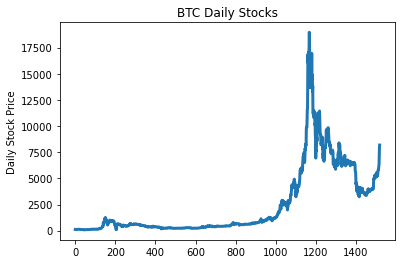

In [31]:
# EXPLORE - WHAT DOES THE DATA LOOK LIKE - IN A CHART?

fig, ax = plt.subplots()
ax.plot(df['BTC'], linewidth=3)
ax.set_ylabel('Daily Stock Price')
ax.set_title('BTC Daily Stocks')

In [32]:
# EXPLORE - IS OUR TIME SERIES STATIONARY OR NOT?

result = adfuller(df['BTC'], autolag='AIC')

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.323081
p-value: 0.618548
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


ADF Statistic: -4.635254
p-value: 0.000111
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


<AxesSubplot:>

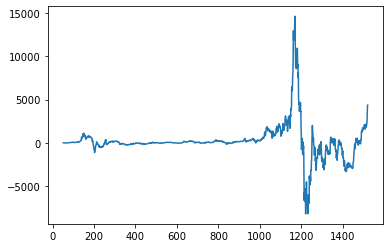

In [34]:
# SCRUB - OUR TIME SERIES IS NOT STATIONARY - WE NEED TO TAKE THE DIFFERENCE
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)


X = df['BTC']
X = X.astype('float32')
# difference data
weeks_in_year = 52
stationary = difference(X, weeks_in_year)
stationary.index = df.index[weeks_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

# plot
stationary.plot()

In [35]:
# SCRUB - SOME CODE TO INVERT DIFFERENCE VALUE
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

ValueError: could not convert string to float: '5/1/2013'

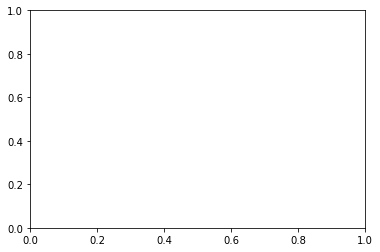

In [36]:
# USING STATIONARY TIME SERIES LOOK AT ACF

series = stationary

plot_acf(df)